In [310]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

In [311]:
from zipfile import ZipFile
import geopandas as gpd

In [312]:
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [222]:
XLSX_PATH = os.path.join('data', '2018_midterm', 'table03.xlsx')
voting_ages = pd.read_excel(XLSX_PATH, skiprows=4, header=[0,1,2])
voting_ages = voting_ages.reset_index(drop=True)

In [223]:
voting_ages = voting_ages.rename(columns=lambda x: x.lstrip().rstrip().replace(' ', '_'))
voting_ages = voting_ages.rename(columns=lambda x: x if not 'Unnamed' in str(x) else x.replace('Unnamed:_', 'c'))
voting_ages = voting_ages.rename(columns=lambda x: x if not '_level_' in str(x) else x.replace('_level_', 'r'))
voting_ages = voting_ages.iloc[0:79].copy()
voting_ages.loc[:, ('Region,_division_and_age', slice(None), slice(None))] = voting_ages.loc[:, ('Region,_division_and_age', slice(None), slice(None))].fillna(method='ffill')
voting_ages

Region,_division_and_age                                    \
                       c0r1     c1r1                     c2r1   
                       c0r2     c1r2                     c2r2   
0             UNITED STATES                                     
1                 NORTHEAST    TOTAL  Total 18 years and over   
2                 NORTHEAST    TOTAL           18 to 24 years   
3                 NORTHEAST    TOTAL           25 to 44 years   
4                 NORTHEAST    TOTAL           45 to 64 years   
..                      ...      ...                      ...   
74                     WEST  PACIFIC           18 to 24 years   
75                     WEST  PACIFIC           25 to 44 years   
76                     WEST  PACIFIC           45 to 64 years   
77                     WEST  PACIFIC           65 to 74 years   
78                     WEST  PACIFIC        75 years and over   

   Total_population    United_States_citizen                              \
               c3r1 Total_Citizen_Population Reported_registered           
               c3r2                     c4r2              Number Percent   
0            249748                   228832              153066    66.9   
1             44194                    40243               26820    66.6   
2              4936                     4461                2161    48.4   
3             14716                    12632                7878    62.4   
4             14825                    13768                9842    71.5   
..              ...                      ...                 ...     ...   
74             4554                     4198                1999    47.6   
75            15111                    12264                7444    60.7   
76            13441                    11626                7940    68.3   
77             4535                     4200                3123    74.4   
78             3250                     3071                2171    70.7   

                                                                         \
   Reported_not_registered         No_response_to_registration1           
                    Number Percent                       Number Percent   
0                    33791    14.8                        41975    18.3   
1                     5487    13.6                         7937    19.7   
2                     1089    24.4                         1212    27.2   
3                     2026      16                         2728    21.6   
4                     1504    10.9                         2422    17.6   
..                     ...     ...                          ...     ...   
74                     971    23.1                         1228    29.2   
75                    2121    17.3                         2698      22   
76                    1584    13.6                         2103    18.1   
77                     391     9.3                          686    16.3   
78                     336      11                          563    18.3   

                                                                             \
   Reported_voted         Reported_not_voted         No_response_to_voting2   
           Number Percent             Number Percent                 Number   
0          122281    53.4              66109    28.9                  40442   
1           21378    53.1              11187    27.8                   7678   
2            1488    33.3               1799    40.3                   1174   
3            5862    46.4               4152    32.9                   2618   
4            8116    58.9               3263    23.7                   2389   
..            ...     ...                ...     ...                    ...   
74           1481    35.3               1492    35.5                   1225   
75           5918    48.3               3704    30.2                   2641   
76           6867    59.1               2703    23.3                   2056   
77           2882    68.6   

In [288]:
voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL']))]

Region,_division_and_age                                 Total_population  \
                       c0r1   c1r1                     c2r1             c3r1   
                       c0r2   c1r2                     c2r2             c3r2   
1                 NORTHEAST  TOTAL  Total 18 years and over            44194   
2                 NORTHEAST  TOTAL           18 to 24 years             4936   
3                 NORTHEAST  TOTAL           25 to 44 years            14716   
4                 NORTHEAST  TOTAL           45 to 64 years            14825   
5                 NORTHEAST  TOTAL           65 to 74 years             5617   
6                 NORTHEAST  TOTAL        75 years and over             4100   
19                  MIDWEST  TOTAL  Total 18 years and over            51779   
20                  MIDWEST  TOTAL           18 to 24 years             6044   
21                  MIDWEST  TOTAL           25 to 44 years            17173   
22                  MIDWEST  TOTAL           45 to 64 years            17806   
23                  MIDWEST  TOTAL           65 to 74 years             6227   
24                  MIDWEST  TOTAL        75 years and over             4530   
37                    SOUTH  TOTAL  Total 18 years and over            94472   
38                    SOUTH  TOTAL           18 to 24 years            11301   
39                    SOUTH  TOTAL           25 to 44 years            31976   
40                    SOUTH  TOTAL           45 to 64 years            31225   
41                    SOUTH  TOTAL           65 to 74 years            12058   
42                    SOUTH  TOTAL        75 years and over             7912   
61                     WEST  TOTAL  Total 18 years and over            59304   
62                     WEST  TOTAL           18 to 24 years             6713   
63                     WEST  TOTAL           25 to 44 years            21688   
64                     WEST  TOTAL           45 to 64 years            19421   
65                     WEST  TOTAL           65 to 74 years             6797   
66                     WEST  TOTAL        75 years and over             4685   

      United_States_citizen                              \
   Total_Citizen_Population Reported_registered           
                       c4r2              Number Percent   
1                     40243               26820    66.6   
2                      4461                2161    48.4   
3                     12632                7878    62.4   
4                     13768                9842    71.5   
5                      5378                4106    76.3   
6                      4004                2832    70.7   
19                    49448               34958    70.7   
20                     5696                2986    52.4   
21                    15940               10583    66.4   
22                    17171               12877    75.0   
23                     6159                4944    80.3   
24                     4483                3569    79.6   
37                    86875               57479    66.2   
38                    10559                5114    48.4   
39                    28059               17273    61.6   
40                    28992               20475    70.6   
41                    11627                8837    76.0   
42                     7639                5781    75.7   
61                    52265               33809    64.7   
62                     6234                2980    47.8   
63                    18053               10991    60.9   
64                    17154               11838    69.0   
65                     6371                4802    75.4   
66                     4453                3198    71.8   

                                                                         \
   Reported_not_registered         No_response_to_registration1           
                    Number Percent                       Number Percent   
1                     5

In [244]:
voting_ages.loc[voting_ages.loc[:, ('Region,_division_and_age', 'c2r1', 'c2r2')].isin(['Total 18 years and over'])]

Region,_division_and_age                                               \
                       c0r1                c1r1                     c2r1   
                       c0r2                c1r2                     c2r2   
1                 NORTHEAST               TOTAL  Total 18 years and over   
7                 NORTHEAST         NEW ENGLAND  Total 18 years and over   
13                NORTHEAST     MIDDLE ATLANTIC  Total 18 years and over   
19                  MIDWEST               TOTAL  Total 18 years and over   
25                  MIDWEST  EAST NORTH CENTRAL  Total 18 years and over   
31                  MIDWEST  WEST NORTH CENTRAL  Total 18 years and over   
37                    SOUTH               TOTAL  Total 18 years and over   
43                    SOUTH      SOUTH ATLANTIC  Total 18 years and over   
49                    SOUTH  EAST SOUTH CENTRAL  Total 18 years and over   
55                    SOUTH  WEST SOUTH CENTRAL  Total 18 years and over   
61                     WEST               TOTAL  Total 18 years and over   
67                     WEST            MOUNTAIN  Total 18 years and over   
73                     WEST             PACIFIC  Total 18 years and over   

   Total_population    United_States_citizen                              \
               c3r1 Total_Citizen_Population Reported_registered           
               c3r2                     c4r2              Number Percent   
1             44194                    40243               26820    66.6   
7             11779                    10817                7500    69.3   
13            32414                    29426               19319    65.7   
19            51779                    49448               34958    70.7   
25            35704                    34104               23843    69.9   
31            16075                    15345               11115    72.4   
37            94472                    86875               57479    66.2   
43            50301                    46233               30881    66.8   
49            14519                    14052                9662    68.8   
55            29652                    26590               16936    63.7   
61            59304                    52265               33809    64.7   
67            18413                    16906               11132    65.8   
73            40891                    35359               22677    64.1   

                                                                         \
   Reported_not_registered         No_response_to_registration1           
                    Number Percent                       Number Percent   
1                     5487    13.6                         7937    19.7   
7                     1389    12.8                         1928    17.8   
13                    4098    13.9                         6009    20.4   
19                    6578    13.3                         7912      16   
25                    4602    13.5                         5659    16.6   
31                    1977    12.9                         2253    14.7   
37                   13412    15.4                        15985    18.4   
43                    5830    12.6                         9523    20.6   
49                    2427    17.3                         1963      14   
55                    5155    19.4                         4499    16.9   
61                    8314    15.9                        10142    19.4   
67                    2910    17.2                         2865    16.9   
73                    5404    15.3                         7278    20.6   

                                                                             \
   Reported_voted         Reported_not_voted         No_response_to_voting2   
           Number Percent             Number Percent                 Number   
1           21378    53.1              11187    27.8                   7678   
7            6046    55.9               2935    27.1

In [245]:
voting_ages.loc[(voting_ages.loc[:, ('Region,_division_and_age', 'c2r1', 'c2r2')].isin(['Total 18 years and over'])) & 
                (voting_ages.loc[:, ('Region,_division_and_age', 'c1r1', 'c1r2')].isin(['TOTAL'])), 
                ('United_States_citizen', 'Reported_voted', 'Percent')]

1     53.1
19      56
37    51.5
61    54.5
Name: (United_States_citizen, Reported_voted, Percent), dtype: object

In [292]:
age_group = ('Region,_division_and_age', 'c2r1', 'c2r2')
total_pops_group = ('Total_population', 'c3r1', 'c3r2')
division_group = ('Region,_division_and_age', 'c1r1', 'c1r2')
us_percent_voted_group = ('United_States_citizen', 'Reported_voted', 'Percent')
us_number_voted_group = ('United_States_citizen', 'Reported_voted', 'Number')
us_percent_registered_group = ('United_States_citizen', 'Reported_registered', 'Percent')
us_number_registered_group = ('United_States_citizen', 'Reported_registered', 'Number')
us_percent_not_registered_group = ('United_States_citizen', 'Reported_not_registered', 'Percent')
us_number_not_registered_group = ('United_States_citizen', 'Reported_not_registered', 'Number')
us_percent_not_voted_group = ('United_States_citizen', 'Reported_not_voted', 'Percent')
us_number_not_voted_group = ('United_States_citizen', 'Reported_not_voted', 'Number')
us_percent_no_response_vote_group = ('United_States_citizen', 'No_response_to_voting2', 'Percent')
us_number_no_response_vote_group = ('United_States_citizen', 'No_response_to_voting2', 'Number')
us_percent_no_response_reg_group = ('United_States_citizen', 'No_response_to_registration1', 'Percent')
us_number_no_response_reg_group = ('United_States_citizen', 'No_response_to_registration1', 'Number')

In [298]:
voting_ages.loc[:, total_pops_group] = voting_ages.loc[:, total_pops_group].astype('int64')
voting_ages.loc[:, us_number_voted_group] = voting_ages.loc[:, us_number_voted_group].astype('int64')
voting_ages.loc[:, us_number_registered_group] = voting_ages.loc[:, us_number_registered_group].astype('int64')
voting_ages.loc[:, us_number_not_registered_group] = voting_ages.loc[:, us_number_not_registered_group].astype('int64')
voting_ages.loc[:, us_number_not_voted_group] = voting_ages.loc[:, us_number_not_voted_group].astype('int64')
voting_ages.loc[:, us_number_no_response_vote_group] = voting_ages.loc[:, us_number_no_response_vote_group].astype('int64')
voting_ages.loc[:, us_number_no_response_reg_group] = voting_ages.loc[:, us_number_no_response_reg_group].astype('int64')

voting_ages.loc[:, us_percent_voted_group] = voting_ages.loc[:, us_percent_voted_group].astype('float')
voting_ages.loc[:, us_percent_registered_group] = voting_ages.loc[:, us_percent_registered_group].astype('float')
voting_ages.loc[:, us_percent_not_registered_group] = voting_ages.loc[:, us_percent_not_registered_group].astype('float')
voting_ages.loc[:, us_percent_not_voted_group] = voting_ages.loc[:, us_percent_not_voted_group].astype('float')
voting_ages.loc[:, us_percent_no_response_vote_group] = voting_ages.loc[:, us_percent_no_response_vote_group].astype('float')
voting_ages.loc[:, us_percent_no_response_reg_group] = voting_ages.loc[:, us_percent_no_response_reg_group].astype('float')

number_groups = [age_group, total_pops_group, us_number_voted_group, us_number_registered_group, us_number_not_registered_group, 
                 us_number_not_voted_group, us_number_no_response_vote_group, us_number_no_response_reg_group]
percent_groups = [age_group, us_percent_voted_group, us_percent_registered_group, us_percent_not_registered_group, 
                  us_percent_not_voted_group, us_percent_no_response_vote_group, us_percent_no_response_reg_group]

In [299]:
voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), number_groups]

Region,_division_and_age Total_population United_States_citizen  \
                       c2r1             c3r1        Reported_voted   
                       c2r2             c3r2                Number   
1   Total 18 years and over            44194                 21378   
2            18 to 24 years             4936                  1488   
3            25 to 44 years            14716                  5862   
4            45 to 64 years            14825                  8116   
5            65 to 74 years             5617                  3553   
6         75 years and over             4100                  2359   
19  Total 18 years and over            51779                 27696   
20           18 to 24 years             6044                  1905   
21           25 to 44 years            17173                  7784   
22           45 to 64 years            17806                 10633   
23           65 to 74 years             6227                  4364   
24        75 years and over             4530                  3010   
37  Total 18 years and over            94472                 44723   
38           18 to 24 years            11301                  3160   
39           25 to 44 years            31976                 12288   
40           45 to 64 years            31225                 16795   
41           65 to 74 years            12058                  7721   
42        75 years and over             7912                  4760   
61  Total 18 years and over            59304                 28483   
62           18 to 24 years             6713                  2174   
63           25 to 44 years            21688                  8653   
64           45 to 64 years            19421                 10285   
65           65 to 74 years             6797                  4487   
66        75 years and over             4685                  2884   

                                                                   \
   Reported_registered Reported_not_registered Reported_not_voted   
                Number                  Number             Number   
1                26820                    5487              11187   
2                 2161                    1089               1799   
3                 7878                    2026               4152   
4                 9842                    1504               3263   
5                 4106                     482               1073   
6                 2832                     386                901   
19               34958                    6578              14204   
20                2986                    1433               2570   
21               10583                    2567               5496   
22               12877                    1805               4167   
23                4944                     480               1091   
24                3569                     293                880   
37               57479                   13412              26813   
38                5114                    2802               4966   
39               17273                    5246              10472   
40               20475                    3563               7347   
41                8837                    1080               2223   
42                5781                     722               1805   
61               33809                    8314              13904   
62                2980                    1623               2468   
63               10991                    3346               5742   
64               11838                    2280               3929   
65                4802                     600                956   
66                3198                     465                809   

                                                        
   No_response_to_voting2 No_response_to_registration1  
                   Number                       Number  
1                    7678                         7937  
2                   

In [302]:
votes_by_age = voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), number_groups].groupby(age_group).sum()
votes_by_age

Total_population United_States_citizen  \
                                                   c3r1        Reported_voted   
                                                   c3r2                Number   
(Region,_division_and_age, c2r1, c2r2)                                          
18 to 24 years                                    28994                  8727   
25 to 44 years                                    85553                 34587   
45 to 64 years                                    83277                 45829   
65 to 74 years                                    30699                 20125   
75 years and over                                 21227                 13013   
Total 18 years and over                          249749                122280   

                                                            \
                                       Reported_registered   
                                                    Number   
(Region,_division_and_age, c2r1, c2r2)                       
18 to 24 years                                       13241   
25 to 44 years                                       46725   
45 to 64 years                                       55032   
65 to 74 years                                       22689   
75 years and over                                    15380   
Total 18 years and over                             153066   

                                                                \
                                       Reported_not_registered   
                                                        Number   
(Region,_division_and_age, c2r1, c2r2)                           
18 to 24 years                                            6947   
25 to 44 years                                           13185   
45 to 64 years                                            9152   
65 to 74 years                                            2642   
75 years and over                                         1866   
Total 18 years and over                                  33791   

                                                           \
                                       Reported_not_voted   
                                                   Number   
(Region,_division_and_age, c2r1, c2r2)                      
18 to 24 years                                      11803   
25 to 44 years                                      25862   
45 to 64 years                                      18706   
65 to 74 years                                       5343   
75 years and over                                    4395   
Total 18 years and over                             66108   

                                                               \
                                       No_response_to_voting2   
                                                       Number   
(Region,_division_and_age, c2r1, c2r2)                          
18 to 24 years                                           6421   
25 to 44 years                                          14235   
45 to 64 years                                          12550   
65 to 74 years                                           4065   
75 years and over                                        3171   
Total 18 years and over                                 40443   

                                                                     
                                       No_response_to_registration1  
                                                             Number  
(Region,_division_and_age, c2r1, c2r2)                               
18 to 24 years                                                 6764  
25 to 44 years                                                14773  
45 to 64 years                                                12902  
65 to 74 years                                                 4204  
75 years and over                                              3333  
Total 18 years and over                               

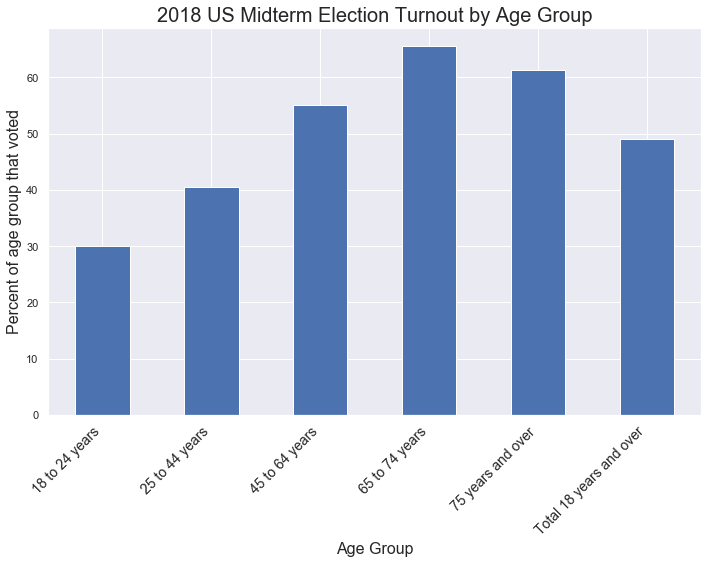

In [320]:
number_groups = [age_group, total_pops_group, us_number_voted_group, us_number_registered_group, us_number_not_registered_group, 
                 us_number_not_voted_group, us_number_no_response_vote_group, us_number_no_response_reg_group]

fig, ax = plt.subplots(figsize=(10,8))
ax = (100*votes_by_age.loc[:, us_number_voted_group] / votes_by_age.loc[:, total_pops_group]).plot(kind='bar', ax=ax)
ax.set_xticklabels(votes_by_age.index, rotation=45, horizontalalignment='right', fontsize=14)
ax.set_ylabel('Percent of age group that voted', fontsize=16)
ax.set_xlabel('Age Group', fontsize=16)
ax.set_title('2018 US Midterm Election Turnout by Age Group', fontsize=20)
plt.tight_layout()

In [269]:
# voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), [age_group, total_pops_group, us_percent_voted_group]]
# voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), [total_pops_group]] 
voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), [us_percent_voted_group]]

,United_States_citizen
,Reported_voted
,Percent
1,53.1
2,33.3
3,46.4
4,58.9
5,66.1
6,58.9
19,56
20,33.4


In [259]:
voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), 
                [age_group, total_pops_group]].groupby(age_group).sum()

,Total_population
"(Region,_division_and_age, c2r1, c2r2)",
18 to 24 years,28994
25 to 44 years,85553
45 to 64 years,83277
65 to 74 years,30699
75 years and over,21227
Total 18 years and over,249749


In [257]:
voting_ages.loc[(voting_ages.loc[:, division_group].isin(['TOTAL'])), 
                [us_percent_voted_group, age_group]].groupby(age_group).sum()

,United_States_citizen
"(Region,_division_and_age, c2r1, c2r2)",
18 to 24 years,131.5
25 to 44 years,186.9
45 to 64 years,238.7
65 to 74 years,273.8
75 years and over,253.1
Total 18 years and over,215.1


In [ ]:
voting_ages.groupby()

In [193]:
tmp = voting_ages.loc[:, ('Region,_division_and_age', slice(None), slice(None))].fillna(method='ffill')
tmp

Region,_division_and_age                                   
                  0_level_1 1_level_1                2_level_1
                  0_level_2 1_level_2                2_level_2
0             UNITED STATES                                   
1                 NORTHEAST     TOTAL  Total 18 years and over
2                 NORTHEAST     TOTAL           18 to 24 years
3                 NORTHEAST     TOTAL           25 to 44 years
4                 NORTHEAST     TOTAL           45 to 64 years
..                      ...       ...                      ...
74                     WEST   PACIFIC           18 to 24 years
75                     WEST   PACIFIC           25 to 44 years
76                     WEST   PACIFIC           45 to 64 years
77                     WEST   PACIFIC           65 to 74 years
78                     WEST   PACIFIC        75 years and over

[79 rows x 3 columns]

In [183]:
base = ['Region','division', 'age']
base.extend(list(voting_ages.columns[3:].get_level_values(0)))
base

['Region',
 'division',
 'age',
 'Total_population',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'United_States_citizen',
 'Total_population',
 'Total_population']

In [163]:
for col in voting_ages.columns:
    print(col)

('Region,_division_and_age', '', '')
('Region,_division_and_age', '', '')
('Region,_division_and_age', '', '')
('Total_population', '', '')
('United_States_citizen', 'Total_Citizen_Population', '')
('United_States_citizen', 'Reported_registered', 'Number')
('United_States_citizen', 'Reported_registered', 'Percent')
('United_States_citizen', 'Reported_not_registered', 'Number')
('United_States_citizen', 'Reported_not_registered', 'Percent')
('United_States_citizen', 'No_response_to_registration1', 'Number')
('United_States_citizen', 'No_response_to_registration1', 'Percent')
('United_States_citizen', 'Reported_voted', 'Number')
('United_States_citizen', 'Reported_voted', 'Percent')
('United_States_citizen', 'Reported_not_voted', 'Number')
('United_States_citizen', 'Reported_not_voted', 'Percent')
('United_States_citizen', 'No_response_to_voting2', 'Number')
('United_States_citizen', 'No_response_to_voting2', 'Percent')
('Total_population', 'Reported_registered', 'Percent')
('Total_popul

In [166]:
voting_ages.columns.levels[1]

Index(['', 'No_response_to_registration1', 'No_response_to_voting2',
       'Reported_not_registered', 'Reported_not_voted', 'Reported_registered',
       'Reported_voted', 'Total_Citizen_Population'],
      dtype='object')

In [179]:
voting_ages.columns.set_levels([['Region', 'division', 'age', 'Total_population', 'United_States_citizen', 'Total_population'], list(voting_ages.columns.levels[1]), list(voting_ages.columns.levels[2])])

ValueError: Level values must be unique: ['Region', 'division', 'age', 'Total_population', 'United_States_citizen', 'Total_population'] on level 0

In [158]:
voting_ages

Region                                 division  \
                                                             
                                                             
0   UNITED STATES                                   249748   
1       NORTHEAST  TOTAL  Total 18 years and over    44194   
2             NaN    NaN           18 to 24 years     4936   
3             NaN    NaN           25 to 44 years    14716   
4             NaN    NaN           45 to 64 years    14825   
..            ...    ...                      ...      ...   
74            NaN    NaN           18 to 24 years     4554   
75            NaN    NaN           25 to 44 years    15111   
76            NaN    NaN           45 to 64 years    13441   
77            NaN    NaN           65 to 74 years     4535   
78            NaN    NaN        75 years and over     3250   

                        age                              \
   Total_Citizen_Population Reported_registered           
                                         Number Percent   
0                    228832              153066    66.9   
1                     40243               26820    66.6   
2                      4461                2161    48.4   
3                     12632                7878    62.4   
4                     13768                9842    71.5   
..                      ...                 ...     ...   
74                     4198                1999    47.6   
75                    12264                7444    60.7   
76                    11626                7940    68.3   
77                     4200                3123    74.4   
78                     3071                2171    70.7   

                                                                         \
   Reported_not_registered         No_response_to_registration1           
                    Number Percent                       Number Percent   
0                    33791    14.8                        41975    18.3   
1                     5487    13.6                         7937    19.7   
2                     1089    24.4                         1212    27.2   
3                     2026      16                         2728    21.6   
4                     1504    10.9                         2422    17.6   
..                     ...     ...                          ...     ...   
74                     971    23.1                         1228    29.2   
75                    2121    17.3                         2698      22   
76                    1584    13.6                         2103    18.1   
77                     391     9.3                          686    16.3   
78                     336      11                          563    18.3   

                                                                             \
   Reported_voted         Reported_not_voted         No_response_to_voting2   
           Number Percent             Number Percent                 Number   
0          122281    53.4              66109    28.9                  40442   
1           21378    53.1              11187    27.8                   7678   
2            1488    33.3               1799    40.3                   1174   
3            5862    46.4               4152    32.9                   2618   
4            8116    58.9               3263    23.7                   2389   
..            ...     ...                ...     ...                    ...   
74           1481    35.3               1492    35.5                   1225   
75           5918    48.3               3704    30.2                   2641   
76           6867    59.1               2703    23.3                   2056   
77           2882    68.6                667    15.9                    651   
78           1933    62.9                590    19.2                    548   

                      division                 
           Reported_registered Reported_voted  
   Percent             Percent        Percent  
0     17.7   

In [144]:
idx = pd.MultiIndex.from_tuples([(1, 'one'), (1, 'two'),
                                 (2, 'one'), (2, 'two'),
                                 (3, 'one'), (3, 'two')],
                                names=['foo', 'bar'])

In [145]:
idx

MultiIndex([(1, 'one'),
            (1, 'two'),
            (2, 'one'),
            (2, 'two'),
            (3, 'one'),
            (3, 'two')],
           names=['foo', 'bar'])

In [146]:
idx.set_levels([['a', 'b', 'c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['foo', 'bar'])

In [147]:
idx.set_levels(['a', 'b', 'c'], level=0)

MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two'),
            ('c', 'one'),
            ('c', 'two')],
           names=['foo', 'bar'])

In [142]:
type(voting_ages.columns)

pandas.core.indexes.multi.MultiIndex

In [143]:
# voting_ages.columns??

In [138]:
voting_ages.unstack().reset_index()

,level_0,level_1,level_2,level_3,0
0,"Region,_division_and_age",,,0,UNITED STATES
1,"Region,_division_and_age",,,1,NORTHEAST
2,"Region,_division_and_age",,,2,NaN
3,"Region,_division_and_age",,,3,NaN
4,"Region,_division_and_age",,,4,NaN
...,...,...,...,...,...
1496,Total_population,Reported_voted,Percent,74,32.5
1497,Total_population,Reported_voted,Percent,75,39.2
1498,Total_population,Reported_voted,Percent,76,51.1
1499,Total_population,Reported_voted,Percent,77,63.6


In [127]:
base = ['Region','division', 'age']
base.extend(list(voting_ages.columns[3:].get_level_values(0)))
voting_ages.columns.set_levels(base, level=0)

ValueError: Level values must be unique: ['Region', 'division', 'age', 'Total_population', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'United_States_citizen', 'Total_population', 'Total_population'] on level 0

In [ ]:
voting_ages.rename()

In [95]:
tmp = voting_ages.loc[:, ('Region, division and age', slice(None), slice(None))].fillna(method='ffill')
tmp

Region, division and age                                  
                                                             
                                                             
0             UNITED STATES                                  
1                 NORTHEAST    TOTAL  Total 18 years and over
2                 NORTHEAST    TOTAL           18 to 24 years
3                 NORTHEAST    TOTAL           25 to 44 years
4                 NORTHEAST    TOTAL           45 to 64 years
..                      ...      ...                      ...
74                     WEST  PACIFIC           18 to 24 years
75                     WEST  PACIFIC           25 to 44 years
76                     WEST  PACIFIC           45 to 64 years
77                     WEST  PACIFIC           65 to 74 years
78                     WEST  PACIFIC        75 years and over

[79 rows x 3 columns]

In [105]:
voting_ages.loc(axis=1)['Region, division and age', :, :] = voting_ages.loc(axis=1)['Region, division and age', :, :].fillna(method='ffill')


C:\Users\matt\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
C:\Users\matt\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3051: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: cannot handle a non-unique multi-index!

In [104]:
voting_ages.loc(axis=1)['Region, division and age', :, :]

Region, division and age                                
                                                           
                                                           
0             UNITED STATES                                
1                 NORTHEAST  TOTAL  Total 18 years and over
2                       NaN    NaN           18 to 24 years
3                       NaN    NaN           25 to 44 years
4                       NaN    NaN           45 to 64 years
..                      ...    ...                      ...
74                      NaN    NaN           18 to 24 years
75                      NaN    NaN           25 to 44 years
76                      NaN    NaN           45 to 64 years
77                      NaN    NaN           65 to 74 years
78                      NaN    NaN        75 years and over

[79 rows x 3 columns]

In [94]:
tmp.columns.get_level_values(0)

Index(['Region, division and age', 'Region, division and age',
       'Region, division and age'],
      dtype='object')

In [93]:
voting_ages

Region, division and age                                 Total population  \
                                                                               
                                                                               
0             UNITED STATES                                           249748   
1                 NORTHEAST  TOTAL  Total 18 years and over            44194   
2                       NaN    NaN           18 to 24 years             4936   
3                       NaN    NaN           25 to 44 years            14716   
4                       NaN    NaN           45 to 64 years            14825   
..                      ...    ...                      ...              ...   
74                      NaN    NaN           18 to 24 years             4554   
75                      NaN    NaN           25 to 44 years            15111   
76                      NaN    NaN           45 to 64 years            13441   
77                      NaN    NaN           65 to 74 years             4535   
78                      NaN    NaN        75 years and over             3250   

      United States citizen                              \
   Total Citizen Population Reported registered           
                                         Number Percent   
0                    228832              153066    66.9   
1                     40243               26820    66.6   
2                      4461                2161    48.4   
3                     12632                7878    62.4   
4                     13768                9842    71.5   
..                      ...                 ...     ...   
74                     4198                1999    47.6   
75                    12264                7444    60.7   
76                    11626                7940    68.3   
77                     4200                3123    74.4   
78                     3071                2171    70.7   

                                                                          \
   Reported not registered         No response to registration1            
                    Number Percent                        Number Percent   
0                    33791    14.8                         41975    18.3   
1                     5487    13.6                          7937    19.7   
2                     1089    24.4                          1212    27.2   
3                     2026      16                          2728    21.6   
4                     1504    10.9                          2422    17.6   
..                     ...     ...                           ...     ...   
74                     971    23.1                          1228    29.2   
75                    2121    17.3                          2698      22   
76                    1584    13.6                          2103    18.1   
77                     391     9.3                           686    16.3   
78                     336      11                           563    18.3   

                                                                              \
   Reported voted         Reported not voted         No response to voting2    
           Number Percent             Number Percent                  Number   
0          122281    53.4              66109    28.9                   40442   
1           21378    53.1              11187    27.8                    7678   
2            1488    33.3               1799    40.3                    1174   
3            5862    46.4               4152    32.9                    2618   
4            8116    58.9               3263    23.7                    2389   
..            ...     ...                ...     ...                     ...   
74           1481    35.3               1492    35.5                    1225   
75           5918    48.3               3704    30.2                    2641   
76           6867    59.1               2703    23.3                    2056   
77           2882    68.6     

In [56]:
voting_ages.loc[:, voting_ages.columns.get_level_values(0)=='Region, division and age'].columns = [('Region', 'Division', 'Age_Group'), ('Region', 'Division', 'Age_Group'), ('Region', 'Division', 'Age_Group')]

In [78]:
voting_ages.xs(('Region, division and age'), axis=1)

ValueError: cannot handle a non-unique multi-index!

In [68]:
voting_ages

Region, division and age                                 Total population  \
                                                                               
                                                                               
0             UNITED STATES                                           249748   
1                 NORTHEAST  TOTAL  Total 18 years and over            44194   
2                       NaN    NaN           18 to 24 years             4936   
3                       NaN    NaN           25 to 44 years            14716   
4                       NaN    NaN           45 to 64 years            14825   
..                      ...    ...                      ...              ...   
74                      NaN    NaN           18 to 24 years             4554   
75                      NaN    NaN           25 to 44 years            15111   
76                      NaN    NaN           45 to 64 years            13441   
77                      NaN    NaN           65 to 74 years             4535   
78                      NaN    NaN        75 years and over             3250   

      United States citizen                              \
   Total Citizen Population Reported registered           
                                         Number Percent   
0                    228832              153066    66.9   
1                     40243               26820    66.6   
2                      4461                2161    48.4   
3                     12632                7878    62.4   
4                     13768                9842    71.5   
..                      ...                 ...     ...   
74                     4198                1999    47.6   
75                    12264                7444    60.7   
76                    11626                7940    68.3   
77                     4200                3123    74.4   
78                     3071                2171    70.7   

                                                                          \
   Reported not registered         No response to registration1            
                    Number Percent                        Number Percent   
0                    33791    14.8                         41975    18.3   
1                     5487    13.6                          7937    19.7   
2                     1089    24.4                          1212    27.2   
3                     2026      16                          2728    21.6   
4                     1504    10.9                          2422    17.6   
..                     ...     ...                           ...     ...   
74                     971    23.1                          1228    29.2   
75                    2121    17.3                          2698      22   
76                    1584    13.6                          2103    18.1   
77                     391     9.3                           686    16.3   
78                     336      11                           563    18.3   

                                                                              \
   Reported voted         Reported not voted         No response to voting2    
           Number Percent             Number Percent                  Number   
0          122281    53.4              66109    28.9                   40442   
1           21378    53.1              11187    27.8                    7678   
2            1488    33.3               1799    40.3                    1174   
3            5862    46.4               4152    32.9                    2618   
4            8116    58.9               3263    23.7                    2389   
..            ...     ...                ...     ...                     ...   
74           1481    35.3               1492    35.5                    1225   
75           5918    48.3               3704    30.2                    2641   
76           6867    59.1               2703    23.3                    2056   
77           2882    68.6     

## Data

The data used in this notebook was from the [Kaggle 2016 US Election dataset page](https://www.kaggle.com/benhamner/2016-us-election/home).

In [4]:
ZIP_PATH = os.path.join('data', 'election_data.zip') 
with ZipFile(ZIP_PATH) as zip_file:
    with zip_file.open('primary_results.csv') as my_zipped_csv:
        primary_df = pd.read_csv(my_zipped_csv)

primary_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [5]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'cb_2014_us_county_20m.zip')
coord_system = {'init': 'epsg:4326'}
tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
tracts.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,16,017,00395158,0500000US16017,16017,Bonner,06,4492522387,478947473,POLYGON Z ((-117.041214325944 48.045559375514 ...
1,18,087,00450368,0500000US18087,18087,LaGrange,06,983230790,18324388,POLYGON Z ((-85.65975023799092 41.759236686047...
2,41,027,01155131,0500000US41027,41027,Hood River,06,1351717731,29106847,POLYGON Z ((-121.923960492322 45.6542788643778...
3,48,273,01383922,0500000US48273,48273,Kleberg,06,2282585635,541039916,"POLYGON Z ((-98.05946399999999 27.635862 0, -9..."
4,47,085,01639757,0500000US47085,47085,Humphreys,06,1374665964,67186875,"POLYGON Z ((-88.02239 35.965818 0, -87.919043 ..."


(-178, -55)

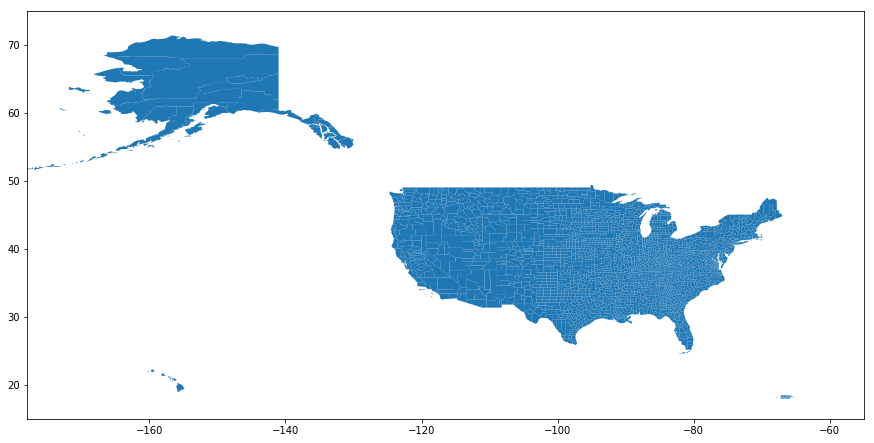

In [6]:
ax = tracts.plot(figsize=(15,10))
ax.set_ylim([15, 75])
ax.set_xlim([-178, -55])

In [7]:
tracts.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,16,017,00395158,0500000US16017,16017,Bonner,06,4492522387,478947473,POLYGON Z ((-117.041214325944 48.045559375514 ...
1,18,087,00450368,0500000US18087,18087,LaGrange,06,983230790,18324388,POLYGON Z ((-85.65975023799092 41.759236686047...
2,41,027,01155131,0500000US41027,41027,Hood River,06,1351717731,29106847,POLYGON Z ((-121.923960492322 45.6542788643778...
3,48,273,01383922,0500000US48273,48273,Kleberg,06,2282585635,541039916,"POLYGON Z ((-98.05946399999999 27.635862 0, -9..."
4,47,085,01639757,0500000US47085,47085,Humphreys,06,1374665964,67186875,"POLYGON Z ((-88.02239 35.965818 0, -87.919043 ..."


In [8]:
primary_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [9]:
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
state                 24611 non-null object
state_abbreviation    24611 non-null object
county                24611 non-null object
fips                  24511 non-null float64
party                 24611 non-null object
candidate             24611 non-null object
votes                 24611 non-null int64
fraction_votes        24611 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [10]:
primary_nn = primary_df[primary_df['fips'].notnull()].copy()
primary_nn['fips'] = primary_nn['fips'].astype(int)
primary_nn['fips'] = primary_nn['fips'].astype(str)
primary_nn['fips'].head()

0    1001
1    1001
2    1003
3    1003
4    1005
Name: fips, dtype: object

In [11]:
def fips_fixer(row):
    while (len(row['fips']) < 5):
        row['fips'] = '0' + row['fips']
    return row['fips']

primary_nn['fixed_fips'] = primary_nn.apply(fips_fixer, axis=1)
primary_nn.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,fixed_fips
0,Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182,01001
1,Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800,01001
2,Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329,01003
3,Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647,01003
4,Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078,01005


In [12]:
dem_df = primary_nn[primary_nn['party'] == 'Democrat']
rep_df = primary_nn[primary_nn['party'] == 'Republican']
dem_primary = dem_df.pivot(index='fixed_fips', columns='candidate', values='fraction_votes')
rep_primary = rep_df.pivot(index='fixed_fips', columns='candidate', values='fraction_votes')
dem_primary_shp = pd.merge(left=tracts, right=dem_primary, left_on='GEOID', right_index=True)
rep_primary_shp = pd.merge(left=tracts, right=rep_primary, left_on='GEOID', right_index=True)

In [13]:
dem_primary_shp.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,No Preference,Uncommitted,Bernie Sanders,Hillary Clinton,Martin O'Malley
0,16,017,00395158,0500000US16017,16017,Bonner,06,4492522387,478947473,POLYGON Z ((-117.041214325944 48.045559375514 ...,NaN,NaN,0.793,0.205,NaN
1,18,087,00450368,0500000US18087,18087,LaGrange,06,983230790,18324388,POLYGON Z ((-85.65975023799092 41.759236686047...,NaN,NaN,0.526,0.474,NaN
2,41,027,01155131,0500000US41027,41027,Hood River,06,1351717731,29106847,POLYGON Z ((-121.923960492322 45.6542788643778...,NaN,NaN,0.607,0.393,NaN
3,48,273,01383922,0500000US48273,48273,Kleberg,06,2282585635,541039916,"POLYGON Z ((-98.05946399999999 27.635862 0, -9...",NaN,NaN,0.256,0.707,NaN
4,47,085,01639757,0500000US47085,47085,Humphreys,06,1374665964,67186875,"POLYGON Z ((-88.02239 35.965818 0, -87.919043 ...",NaN,NaN,0.305,0.677,NaN


In [14]:
rep_primary_shp.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Ben Carson,Carly Fiorina,Chris Christie,Donald Trump,Jeb Bush,John Kasich,Marco Rubio,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
0,16,017,00395158,0500000US16017,16017,Bonner,06,4492522387,478947473,POLYGON Z ((-117.041214325944 48.045559375514 ...,NaN,NaN,NaN,0.352,NaN,0.086,0.074,NaN,NaN,NaN,0.457
1,18,087,00450368,0500000US18087,18087,LaGrange,06,983230790,18324388,POLYGON Z ((-85.65975023799092 41.759236686047...,NaN,NaN,NaN,0.470,NaN,0.067,NaN,NaN,NaN,NaN,0.434
2,41,027,01155131,0500000US41027,41027,Hood River,06,1351717731,29106847,POLYGON Z ((-121.923960492322 45.6542788643778...,NaN,NaN,NaN,0.593,NaN,0.243,NaN,NaN,NaN,NaN,0.164
3,48,273,01383922,0500000US48273,48273,Kleberg,06,2282585635,541039916,"POLYGON Z ((-98.05946399999999 27.635862 0, -9...",0.034,NaN,NaN,0.272,NaN,0.035,0.183,NaN,NaN,NaN,0.445
4,47,085,01639757,0500000US47085,47085,Humphreys,06,1374665964,67186875,"POLYGON Z ((-88.02239 35.965818 0, -87.919043 ...",0.073,NaN,NaN,0.517,NaN,0.026,0.139,NaN,NaN,NaN,0.226


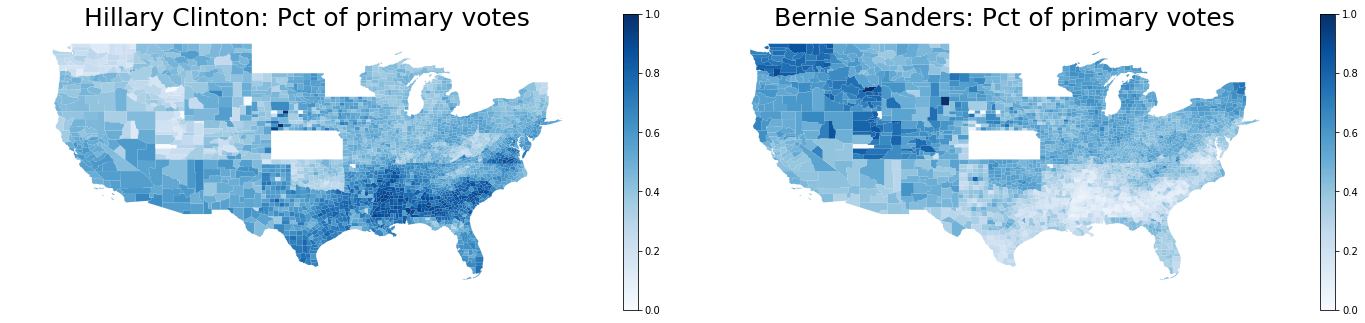

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(20,14))
my_cmap='Blues'
# trimming Hawaii (State FIPS #15)
df = dem_primary_shp[dem_primary_shp['STATEFP'] != '15']

col_ = 'Hillary Clinton'
_ = df.plot(column=col_, cmap=my_cmap, ax=ax[0])
_ = ax[0].axis('off')
_ = ax[0].set_title("{}: Pct of primary votes".format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.3, ax=ax[0])

col_ = 'Bernie Sanders'
_ = df.plot(column=col_, cmap=my_cmap, ax=ax[1])
_ = ax[1].axis('off')
_ = ax[1].set_title("{}: Pct of primary votes".format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.3, ax=ax[1])
plt.tight_layout()

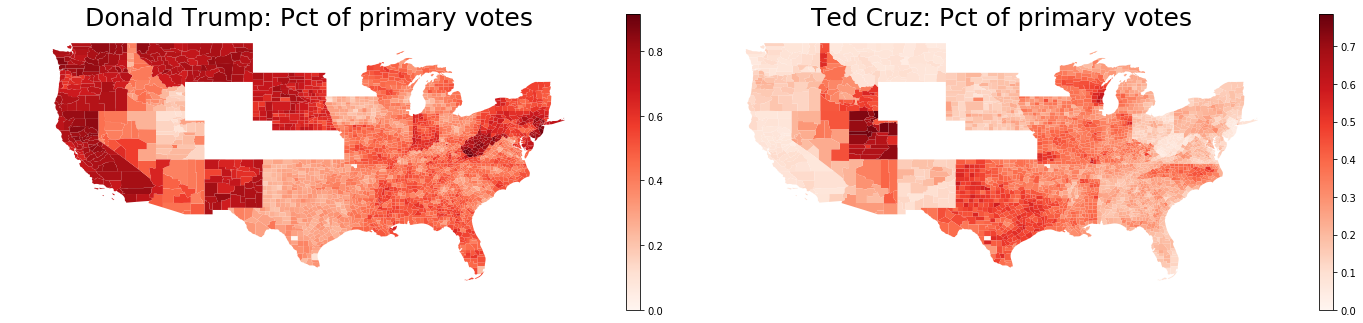

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(20,14))
my_cmap='Reds'
df = rep_primary_shp[rep_primary_shp['STATEFP'] != '15']

col_ = 'Donald Trump'
_ = df.plot(column=col_, cmap=my_cmap, ax=ax[0])
_ = ax[0].axis('off')
_ = ax[0].set_title("{}: Pct of primary votes".format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.3, ax=ax[0])

col_ = 'Ted Cruz'
_ = df.plot(column=col_, cmap=my_cmap, ax=ax[1])
_ = ax[1].axis('off')
_ = ax[1].set_title("{}: Pct of primary votes".format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.3, ax=ax[1])
plt.tight_layout()

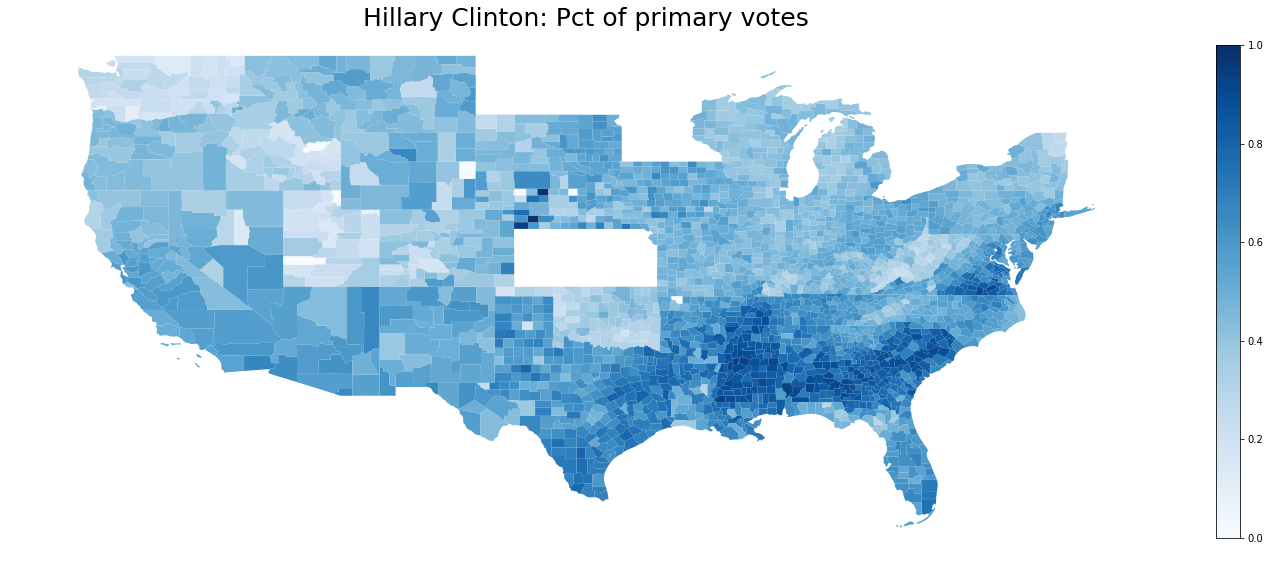

In [17]:
fig, ax = plt.subplots(figsize=(20,14))
my_cmap='Blues'
df = dem_primary_shp[dem_primary_shp['STATEFP'] != '15']
col_ = 'Hillary Clinton'

_ = df.plot(column=col_, cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title('{}: Pct of primary votes'.format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), 
                                                            vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

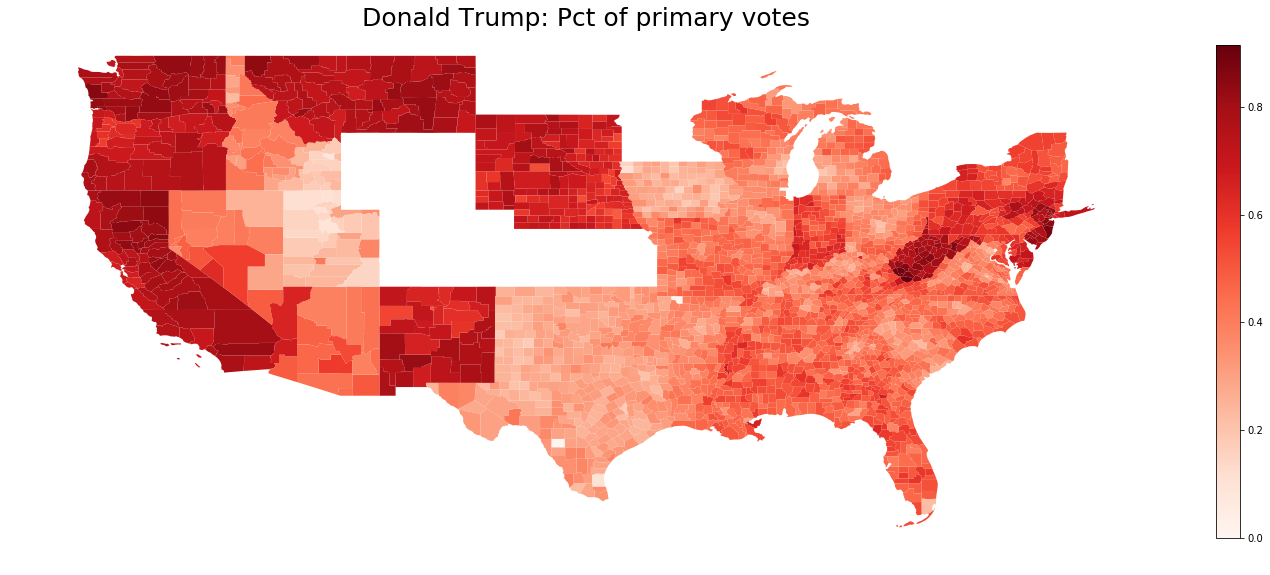

In [18]:
fig, ax = plt.subplots(figsize=(20,14))
my_cmap='Reds'
df = rep_primary_shp[rep_primary_shp['STATEFP'] != '15']
col_ = 'Donald Trump'

_ = df.plot(column=col_, cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title('{}: Pct of primary votes'.format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=df[col_].min(), 
                                                            vmax=df[col_].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()